In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 [==============================] - 11s 1us/step


In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=128)

Epoch 1/10


469/469 [==============================] - 22s 28ms/step - loss: 0.3603 - accuracy: 0.9016 - val_loss: 0.1890 - val_accuracy: 0.9453
Epoch 2/10
469/469 [==============================] - 12s 26ms/step - loss: 0.1652 - accuracy: 0.9533 - val_loss: 0.1466 - val_accuracy: 0.9566
Epoch 3/10
469/469 [==============================] - 12s 26ms/step - loss: 0.1193 - accuracy: 0.9661 - val_loss: 0.1172 - val_accuracy: 0.9671
Epoch 4/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0927 - accuracy: 0.9729 - val_loss: 0.0950 - val_accuracy: 0.9722
Epoch 5/10
469/469 [==============================] - 12s 27ms/step - loss: 0.0735 - accuracy: 0.9787 - val_loss: 0.0896 - val_accuracy: 0.9733
Epoch 6/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0617 - accuracy: 0.9824 - val_loss: 0.0831 - val_accuracy: 0.9741
Epoch 7/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0514 - accuracy: 0.9851 - val_loss: 0.0794 - val_accurac

In [5]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 [==============================] - 5s 16ms/step - loss: 0.0761 - accuracy: 0.9766
Test accuracy: 0.9766


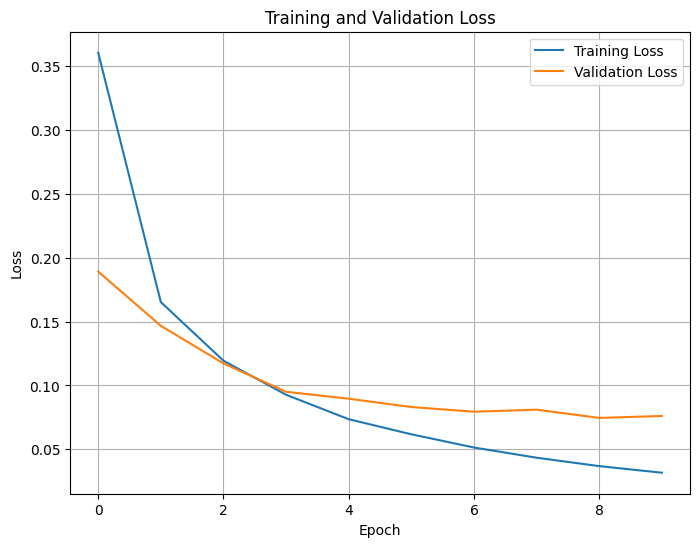

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

313/313 [==============================] - 5s 15ms/step


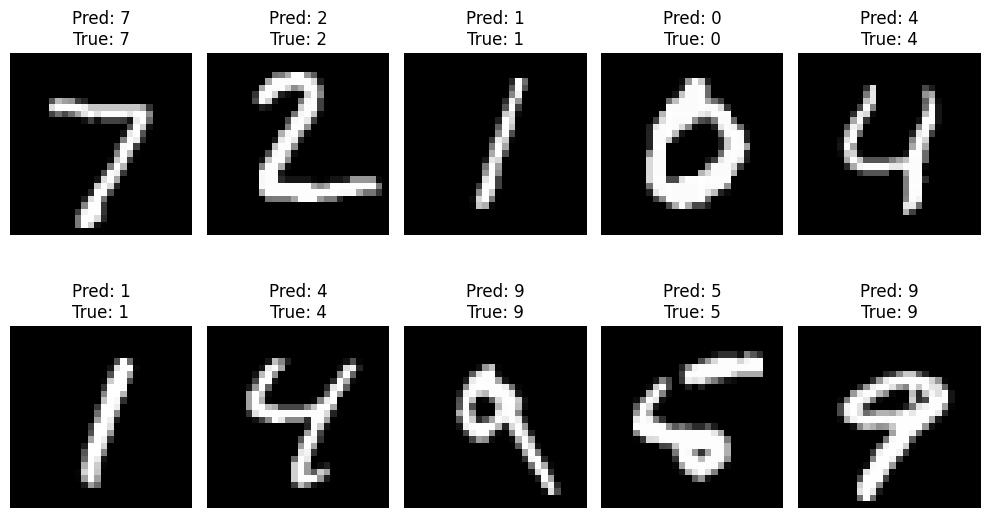

In [8]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}')
    plt.axis('off')
plt.tight_layout()